In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 30)
%load_ext autotime
%matplotlib inline

In [2]:
yearly_preprocessed_data = {}
for year in range(2000,2020):
    yearly_preprocessed_data[year] = pd.read_csv("../data/preprocessed_data/{}.csv".format(year))

time: 310 ms


In [3]:
all_preprocessed_data = pd.read_csv("../data/all_preprocessed_data.csv")

time: 65.8 ms


In [4]:
position_names = ['PG', 'SG', 'SF', 'PF', 'C']

time: 1.05 ms


In [5]:
all_preprocessed_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Tariq Abdul-Wahad,SG,25,TOT,61,56,1578,274,646,3,23,271,623,146,193,101,190,291,98,59,28,106,147,697
1,2,Shareef Abdur-Rahim,SF,23,VAN,82,82,3223,594,1277,29,96,565,1181,446,551,218,607,825,271,89,87,249,244,1663
2,3,Cory Alexander,PG,26,DEN,29,2,329,28,98,9,35,19,63,17,22,8,34,42,58,24,2,28,39,82
3,4,Ray Allen*,SG,24,MIL,82,82,3070,642,1411,172,407,470,1004,353,398,83,276,359,308,110,19,183,187,1809
4,5,Rafer Alston,PG,23,MIL,27,0,361,27,95,3,14,24,81,3,4,5,18,23,70,12,0,29,29,60


time: 57.8 ms


In [6]:
position_counts = all_preprocessed_data['Pos'].value_counts().reset_index().rename(columns={"index":"Position", "Pos":"Count"})

time: 43 ms


In [7]:
yearly_averages_by_pos = pd.DataFrame()
for year in range(2000,2020):
    averages_by_pos = yearly_preprocessed_data[year].groupby("Pos").sum().reset_index()[["Pos", "G", "3PA", "AST", "Age", "TRB", "PTS"]]
    averages_by_pos["3PA_per_game"] = averages_by_pos['3PA']/averages_by_pos['G']
    averages_by_pos["Assists_per_game"] = averages_by_pos['AST']/averages_by_pos['G']
    averages_by_pos["Rebounds_per_game"] = averages_by_pos['TRB']/averages_by_pos['G']
    averages_by_pos["Points_per_game"] = averages_by_pos['TRB']/averages_by_pos['G']
    averages_by_pos["Year"] = year
    pos_counts = yearly_preprocessed_data[year]['Pos'].value_counts().reset_index().rename(columns={"index":"Pos", "Pos":"Count"})
    averages_by_pos = averages_by_pos.merge(pos_counts, on="Pos")
    averages_by_pos["Age"] = averages_by_pos["Age"]/averages_by_pos["Count"]
    yearly_averages_by_pos = yearly_averages_by_pos.append(averages_by_pos)

time: 433 ms


In [8]:
yearly_averages_by_pos.head()

,Pos,G,3PA,AST,Age,TRB,PTS,3PA_per_game,Assists_per_game,Rebounds_per_game,Points_per_game,Year,Count
0,C,4749,382,4257,27.965517,26790,37419,0.080438,0.896399,5.641188,5.641188,2000,87
1,PF,5181,3475,7299,27.968750,29369,48565,0.670720,1.408801,5.668597,5.668597,2000,96
2,PG,5244,10205,21984,27.712766,12132,45123,1.946034,4.192220,2.313501,2.313501,2000,94
3,SF,4979,8362,10076,27.186047,20936,54813,1.679454,2.023700,4.204860,4.204860,2000,86
4,SG,3998,10054,9319,27.479452,12311,44888,2.514757,2.330915,3.079290,3.079290,2000,73


time: 22.3 ms


In [16]:
all_preprocessed_data["3PA_per_game"] = all_preprocessed_data["3PA"] / all_preprocessed_data["G"]
all_preprocessed_data["Points_per_game"] = all_preprocessed_data["PTS"] / all_preprocessed_data["G"]
all_preprocessed_data["Rebounds_per_game"] = all_preprocessed_data["TRB"] / all_preprocessed_data["G"]
all_preprocessed_data["Assists_per_game"] = all_preprocessed_data["AST"] / all_preprocessed_data["G"]

time: 48 ms


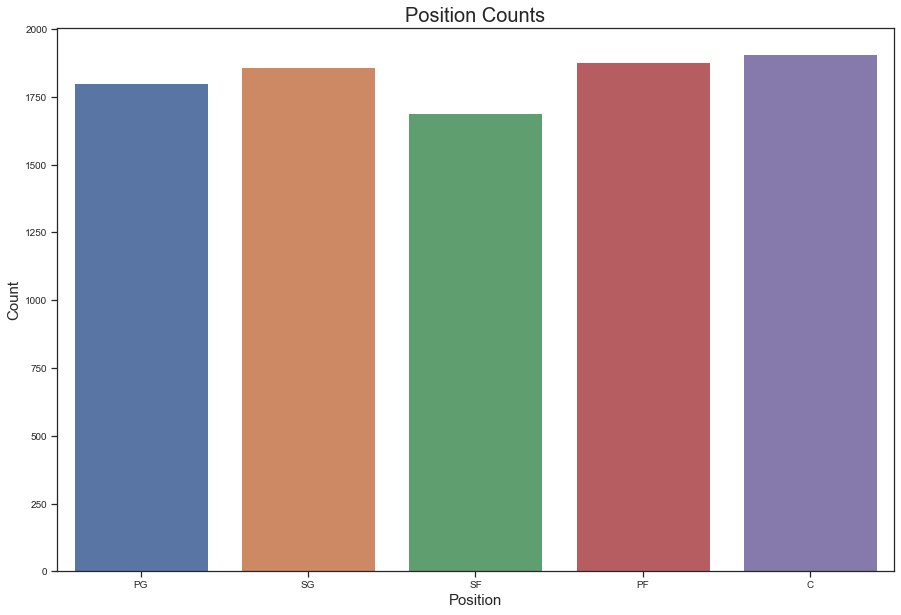

time: 701 ms


In [9]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(15, 10))
plot = sns.barplot("Position", "Count", data=position_counts, order=position_names)
plot.set_xlabel("Position" ,fontsize=15)
plot.set_ylabel("Count",fontsize=15)
plot.set_title("Position Counts", fontsize=20)
plot.tick_params(labelsize=10)

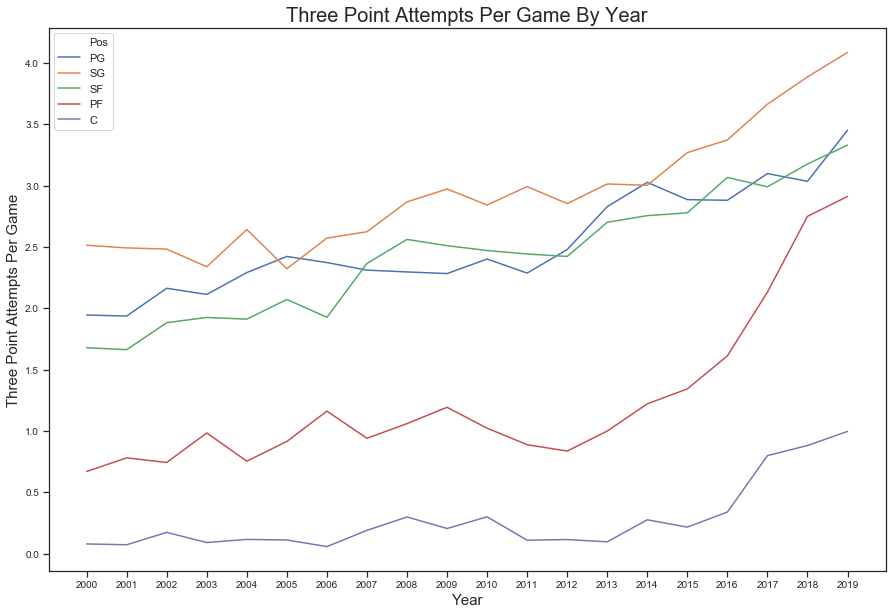

time: 1.63 s


In [54]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(15, 10))
plot = sns.lineplot(x="Year", y="3PA_per_game", hue="Pos", hue_order=position_names, data=yearly_averages_by_pos)
plot.set_xlabel("Year" ,fontsize=15)
plot.set_ylabel("Three Point Attempts Per Game",fontsize=15)
plot.set_title("Three Point Attempts Per Game By Year", fontsize=20)
plot.tick_params(labelsize=10)
ax.set(xticks=range(2000,2020))
f.show()

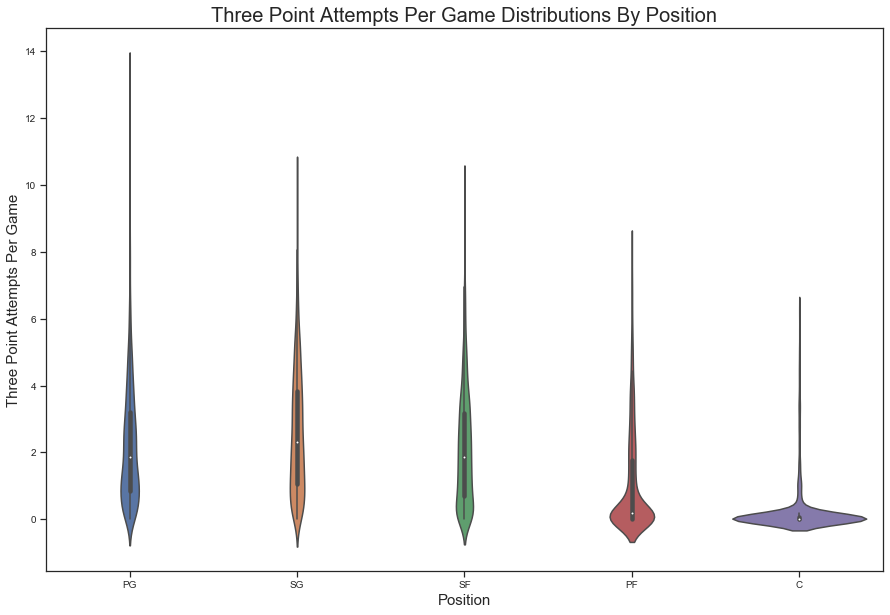

time: 635 ms


In [22]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(15, 10))
plot = sns.violinplot("Pos", "3PA_per_game", data=all_preprocessed_data, order=position_names)
plot.set_xlabel("Position" ,fontsize=15)
plot.set_ylabel("Three Point Attempts Per Game",fontsize=15)
plot.set_title("Three Point Attempts Per Game Distributions By Position", fontsize=20)
plot.tick_params(labelsize=10)

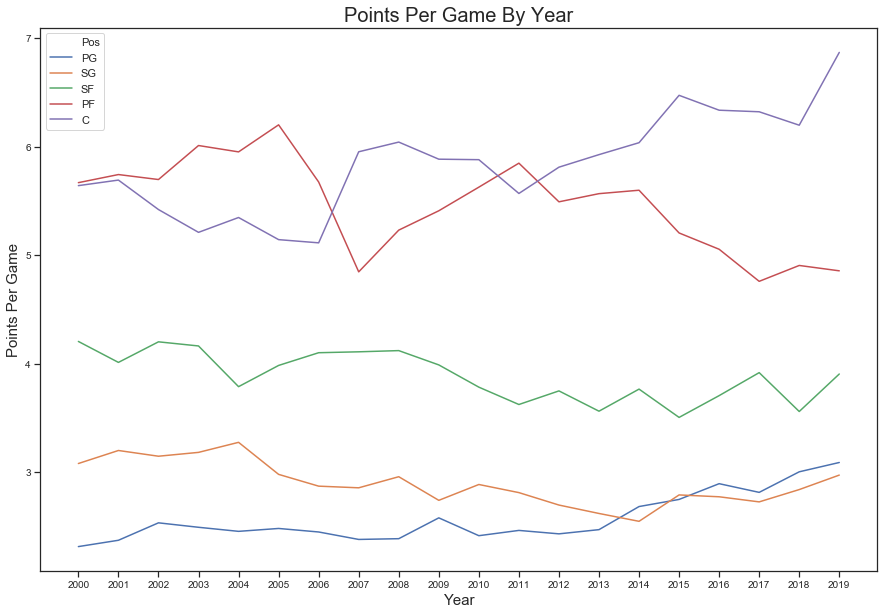

time: 1.25 s


In [69]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(15, 10))
plot = sns.lineplot(x="Year", y="Points_per_game", hue="Pos", hue_order=position_names, data=yearly_averages_by_pos)
plot.set_xlabel("Year" ,fontsize=15)
plot.set_ylabel("Points Per Game",fontsize=15)
plot.set_title("Points Per Game By Year", fontsize=20)
plot.tick_params(labelsize=10)
ax.set(xticks=range(2000,2020))
f.show()

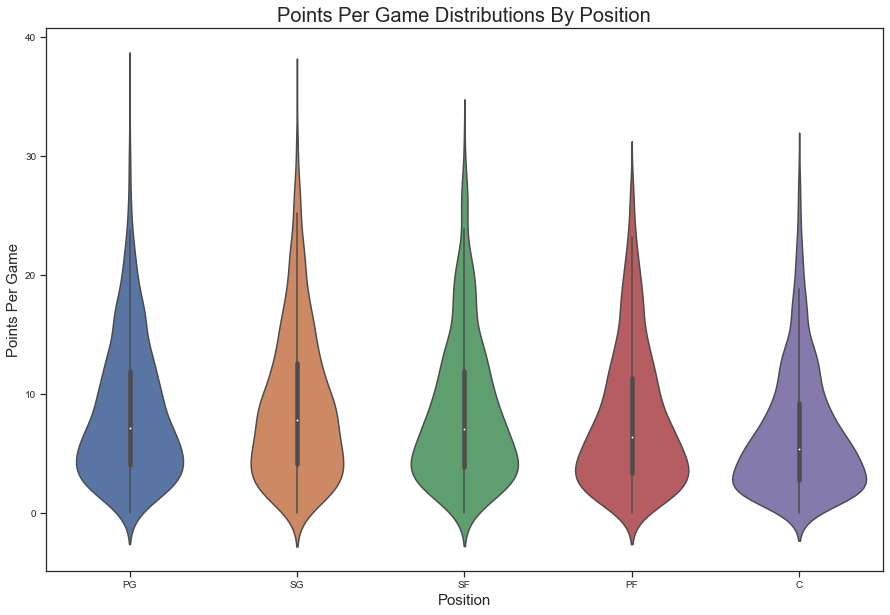

time: 673 ms


In [23]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(15, 10))
plot = sns.violinplot("Pos", "Points_per_game", data=all_preprocessed_data, order=position_names)
plot.set_xlabel("Position" ,fontsize=15)
plot.set_ylabel("Points Per Game",fontsize=15)
plot.set_title("Points Per Game Distributions By Position", fontsize=20)
plot.tick_params(labelsize=10)

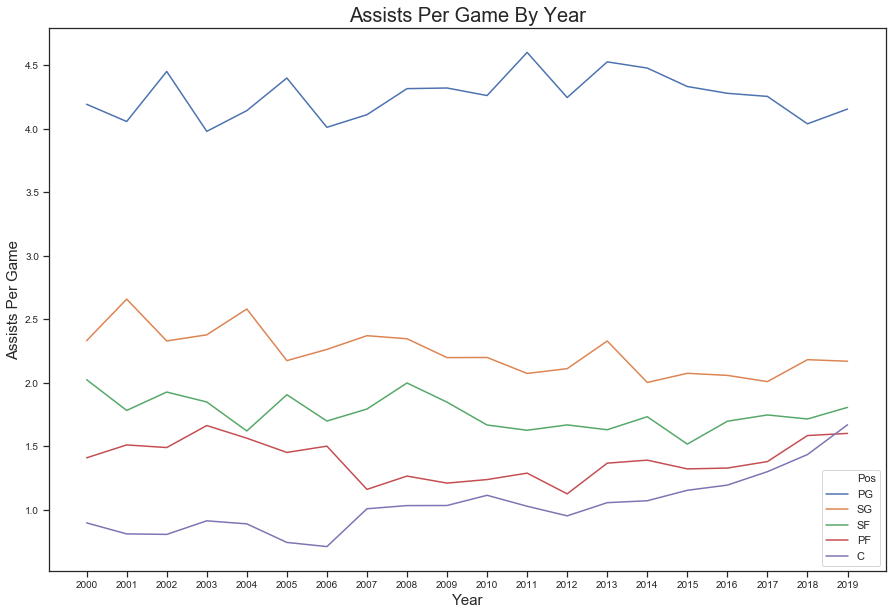

time: 1.45 s


In [57]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(15, 10))
plot = sns.lineplot(x="Year", y="Assists_per_game", hue="Pos", hue_order=position_names, data=yearly_averages_by_pos)
plot.set_xlabel("Year" ,fontsize=15)
plot.set_ylabel("Assists Per Game",fontsize=15)
plot.set_title("Assists Per Game By Year", fontsize=20)
plot.tick_params(labelsize=10)
ax.set(xticks=range(2000,2020))
f.show()

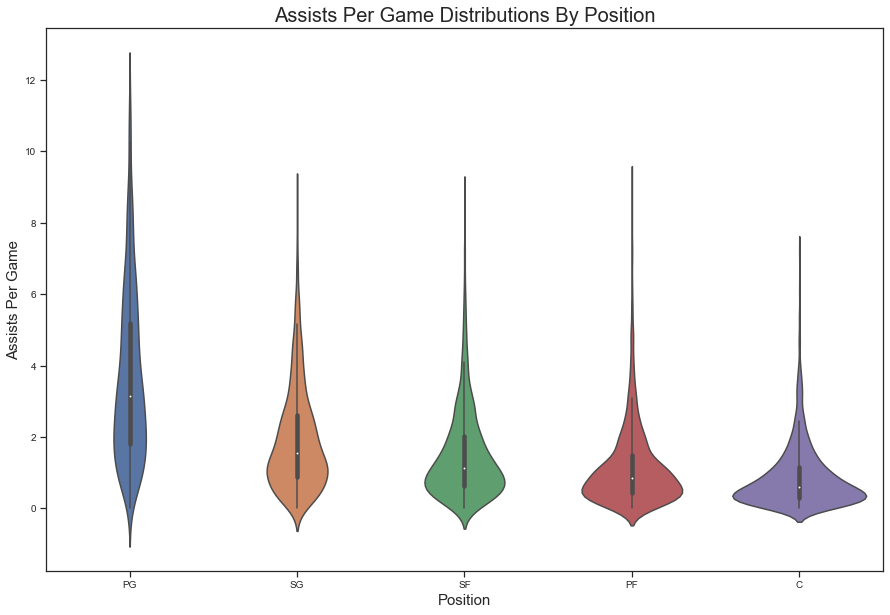

time: 942 ms


In [24]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(15, 10))
plot = sns.violinplot("Pos", "Assists_per_game", data=all_preprocessed_data, order=position_names)
plot.set_xlabel("Position" ,fontsize=15)
plot.set_ylabel("Assists Per Game",fontsize=15)
plot.set_title("Assists Per Game Distributions By Position", fontsize=20)
plot.tick_params(labelsize=10)

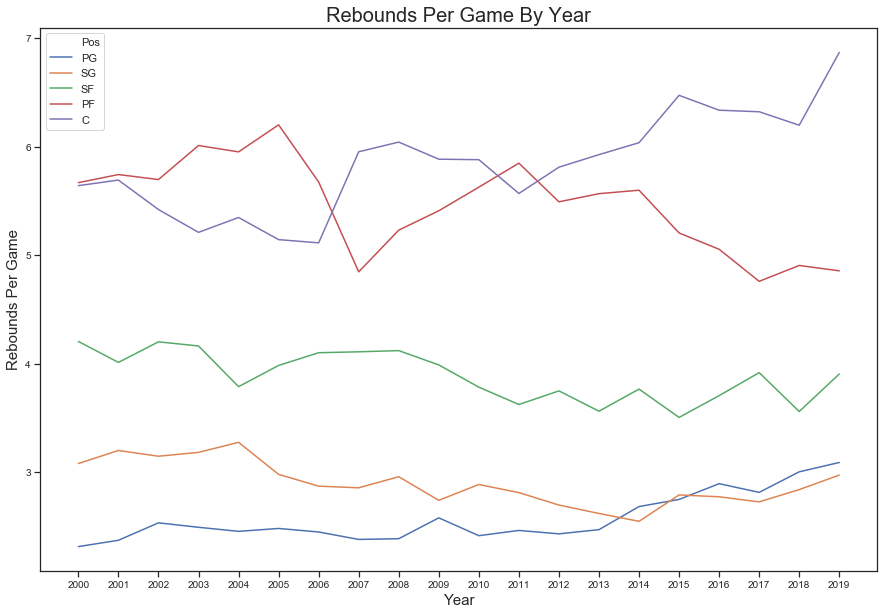

time: 1.77 s


In [70]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(15, 10))
plot = sns.lineplot(x="Year", y="Rebounds_per_game", hue="Pos", hue_order=position_names, data=yearly_averages_by_pos)
plot.set_xlabel("Year" ,fontsize=15)
plot.set_ylabel("Rebounds Per Game",fontsize=15)
plot.set_title("Rebounds Per Game By Year", fontsize=20)
plot.tick_params(labelsize=10)
ax.set(xticks=range(2000,2020))
f.show()

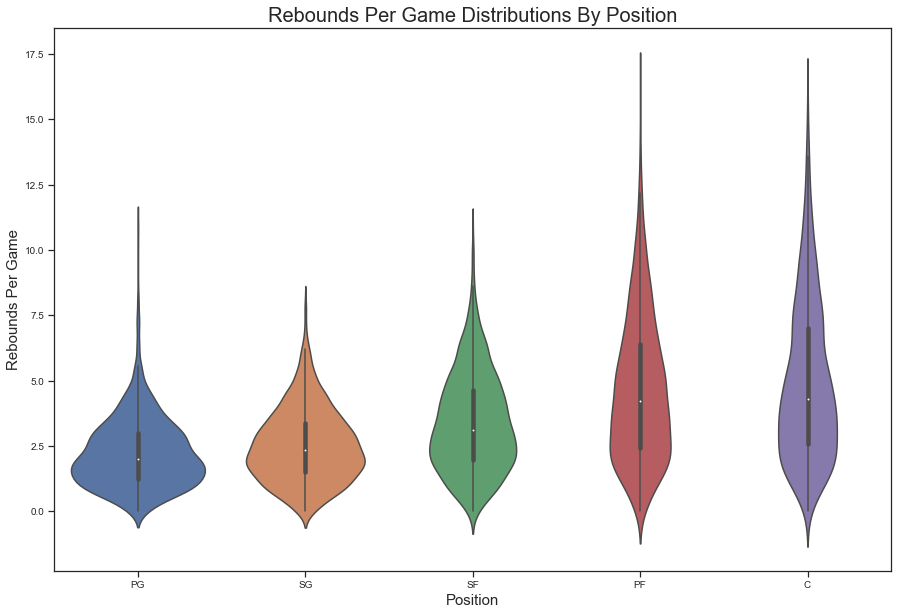

time: 852 ms


In [25]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(15, 10))
plot = sns.violinplot("Pos", "Rebounds_per_game", data=all_preprocessed_data, order=position_names)
plot.set_xlabel("Position" ,fontsize=15)
plot.set_ylabel("Rebounds Per Game",fontsize=15)
plot.set_title("Rebounds Per Game Distributions By Position", fontsize=20)
plot.tick_params(labelsize=10)